<a href="https://colab.research.google.com/github/Zainabb110/CS584-Project/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')
fileName = 'gdrive/My Drive/Colab Notebooks/expenses.csv'
data = pd.read_csv(fileName)
data.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#@title
import numpy as np
# f = open(fileName)
# header = f.readline()
# data = np.loadtxt(f)
#dataset = np.loadtxt(fileName, delimiter=',', header = True)

age = data['age'].tolist()
sex = data['sex'].tolist()
bmi = data['bmi'].tolist()
children = data['children'].tolist()
smoker = data['smoker'].tolist()
region = data['region'].tolist()

y = data['charges'].tolist()
X = [age, sex, bmi, children, smoker, region]

# print("X: ", X)
# print("y: ", y)


In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42,shuffle=True)

#print(train['charges'])
#print(test)

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
model = linear_model.LinearRegression()
data = train
y = data.pop('charges')
X = pd.get_dummies(data, columns = ["sex", "smoker", "region"], drop_first = True)
# print(X)
# print(y)
model.fit(X, y)

LinearRegression()

In [26]:

test_y = test.pop('charges')
test = pd.get_dummies(test, columns = ["sex", "smoker", "region"], drop_first = True)
y_pred = model.predict(test)

In [27]:
y_pred_train = model.predict(X)

In [28]:
print(test)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

print("MSE: ", mean_squared_error(test_y, y_pred))
print("test RMSE: ", mean_squared_error(test_y, y_pred)**0.5)
print("train RMSE:", mean_squared_error(y, y_pred_train)**0.5)
print("R2: ", r2_score(test_y, y_pred))

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
764    45  25.175         2         0           0                 0   
887    36  30.020         0         0           0                 1   
890    64  26.885         0         0           1                 1   
1293   46  25.745         3         1           0                 1   
259    19  31.920         0         1           1                 1   
...   ...     ...       ...       ...         ...               ...   
109    63  35.090         0         1           1                 0   
575    58  27.170         0         0           0                 1   
535    38  28.025         1         1           0                 0   
543    54  47.410         0         0           1                 0   
846    51  34.200         1         0           0                 0   

      region_southeast  region_southwest  
764                  0                 0  
887                  0                 0  
890               

Text(0, 0.5, 'Predicted Training y')

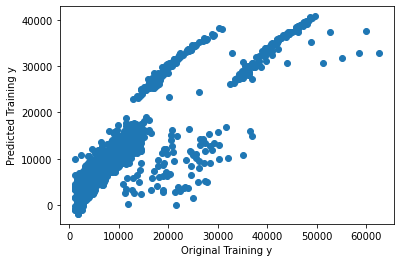

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred_train)
plt.xlabel("Original Training y")
plt.ylabel("Predicted Training y")

Text(0, 0.5, 'Predicted Testing y')

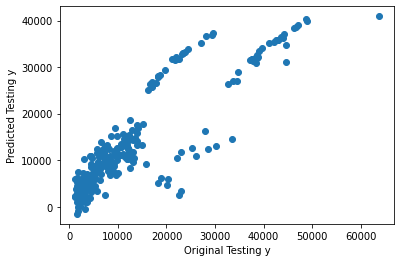

In [30]:
plt.scatter(test_y, y_pred)
plt.xlabel("Original Testing y")
plt.ylabel("Predicted Testing y")